# Implementation of pixel-flipping algorithm

https://bowenroom.github.io/myBlog/pytorch/fastai2/2020/06/01/torch-unfold.html

In [1]:
from torchvision import transforms
import torch
import numpy
from lrp import image

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Resize((224, 224)),
  transforms.ConvertImageDtype(torch.float),
  transforms.Normalize(mean, std)
])

inv_normalize = transforms.Normalize(
   mean= [-m/s for m, s in zip(mean, std)],
   std= [1/s for s in std]
)

# Image is in RGB mode with range [0,1]
img: numpy.array = image.load_normalized_img('../data/castle2.jpg')
X = transform(img)
# Simulate batch by adding a new dimension
X = torch.unsqueeze(X, 0)
X=X[0]
print(X.shape)

torch.Size([3, 224, 224])


In [2]:
patch_size=8
stride=patch_size

import math
print('# patches to expect ',math.floor(X.shape[1]/patch_size))

patches = X.data.unfold(0, 3, 3).unfold(1, patch_size, stride).unfold(2, patch_size, stride)
print(patches.shape)

a = list(patches.shape)

# patches to expect  28
torch.Size([1, 28, 28, 3, 8, 8])


In [3]:
a
torch.from_numpy(numpy.arange(0,a[1]))
patches[:,torch.from_numpy(numpy.arange(0,a[1])),:,:,:,:].shape
x = patches[:,torch.from_numpy(numpy.arange(0,a[1])),:,:,:,:].split(1, dim=1)
x = patches.split(1, dim=1)
# x = patches.split(1, dim=2)

print(len(x))
print(x[0].shape)
print(x[1].shape)

28
torch.Size([1, 1, 28, 3, 8, 8])
torch.Size([1, 1, 28, 3, 8, 8])


torch.Size([3, 8, 8])


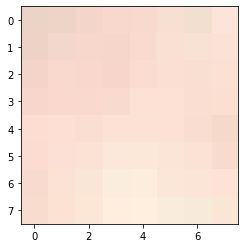

torch.Size([3, 8, 8])


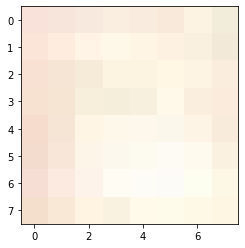

torch.Size([3, 8, 8])


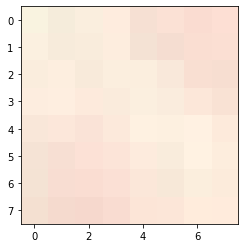

torch.Size([3, 8, 8])


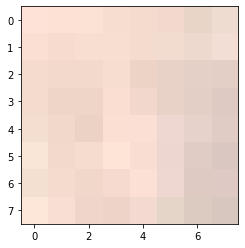

torch.Size([3, 8, 8])


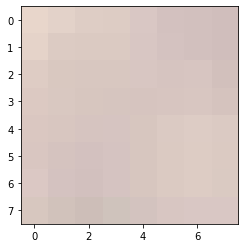

torch.Size([3, 8, 8])


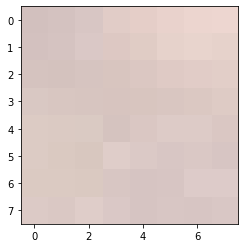

torch.Size([3, 8, 8])


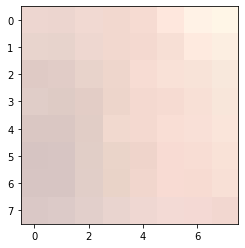

torch.Size([3, 8, 8])


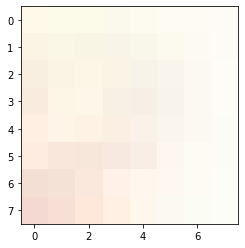

torch.Size([3, 8, 8])


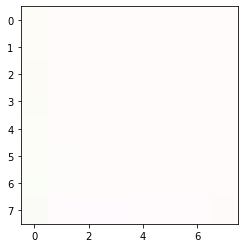

torch.Size([3, 8, 8])


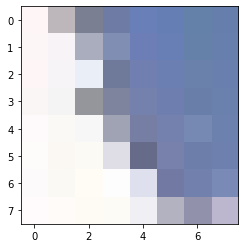

torch.Size([3, 8, 8])


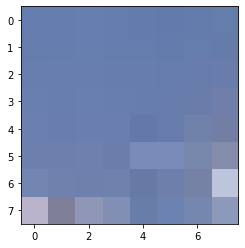

torch.Size([3, 8, 8])


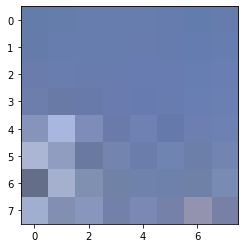

torch.Size([3, 8, 8])


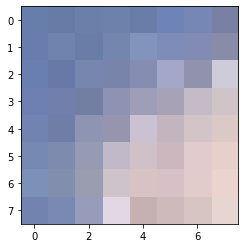

torch.Size([3, 8, 8])


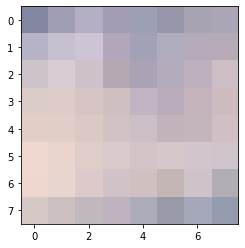

torch.Size([3, 8, 8])


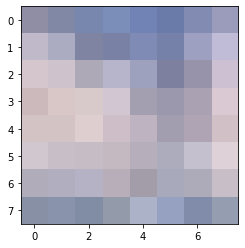

torch.Size([3, 8, 8])


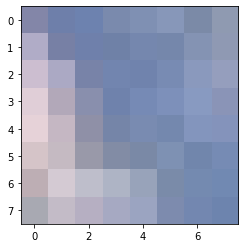

torch.Size([3, 8, 8])


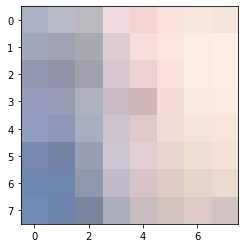

torch.Size([3, 8, 8])


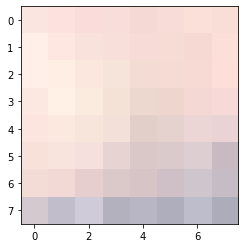

torch.Size([3, 8, 8])


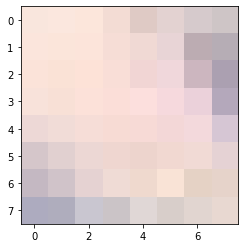

torch.Size([3, 8, 8])


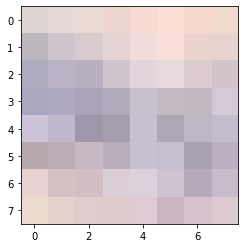

torch.Size([3, 8, 8])


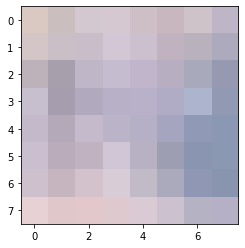

torch.Size([3, 8, 8])


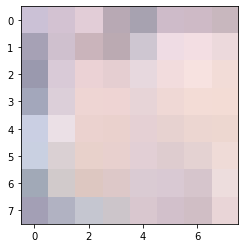

torch.Size([3, 8, 8])


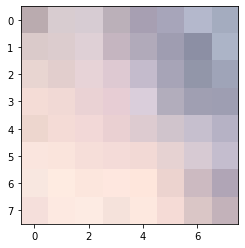

torch.Size([3, 8, 8])


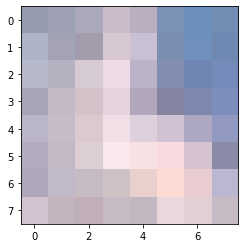

torch.Size([3, 8, 8])


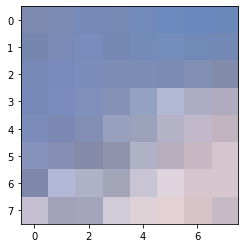

torch.Size([3, 8, 8])


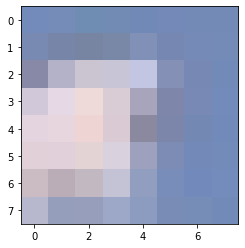

torch.Size([3, 8, 8])


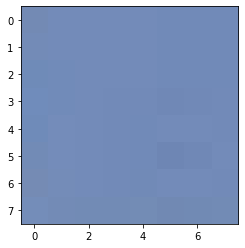

torch.Size([3, 8, 8])


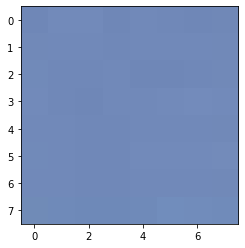

torch.Size([3, 8, 8])


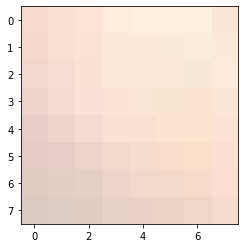

torch.Size([3, 8, 8])


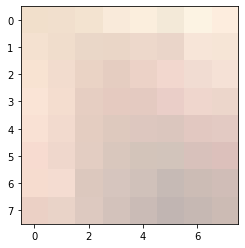

torch.Size([3, 8, 8])


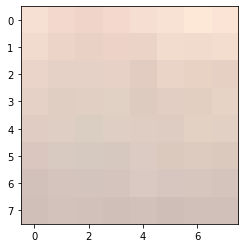

torch.Size([3, 8, 8])


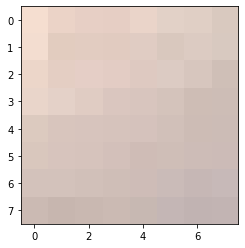

torch.Size([3, 8, 8])


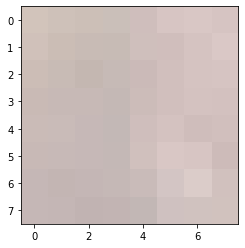

torch.Size([3, 8, 8])


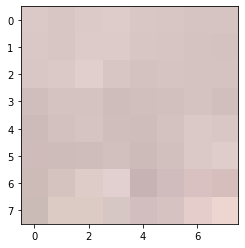

torch.Size([3, 8, 8])


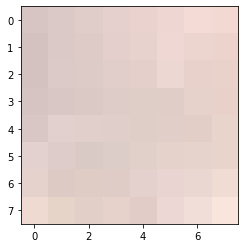

torch.Size([3, 8, 8])


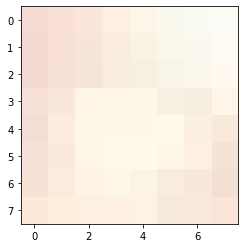

torch.Size([3, 8, 8])


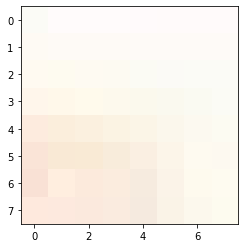

torch.Size([3, 8, 8])


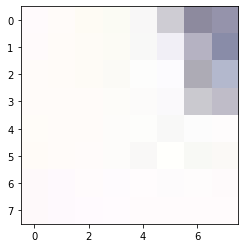

torch.Size([3, 8, 8])


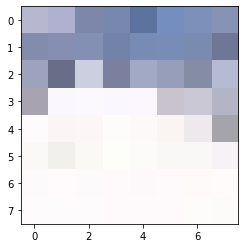

torch.Size([3, 8, 8])


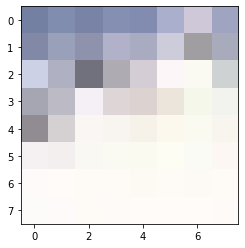

torch.Size([3, 8, 8])


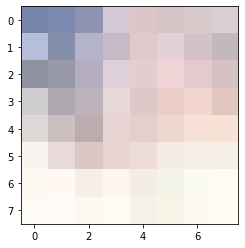

torch.Size([3, 8, 8])


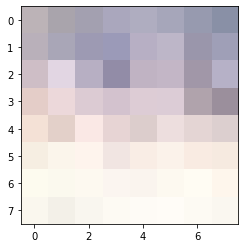

torch.Size([3, 8, 8])


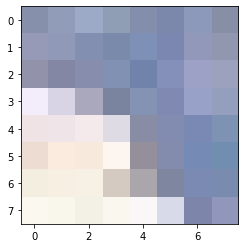

torch.Size([3, 8, 8])


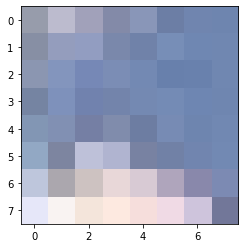

torch.Size([3, 8, 8])


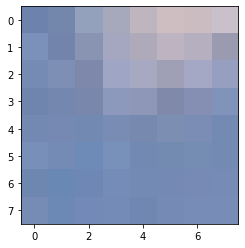

torch.Size([3, 8, 8])


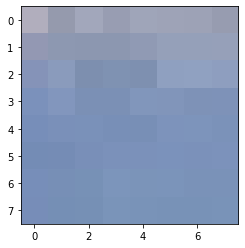

torch.Size([3, 8, 8])


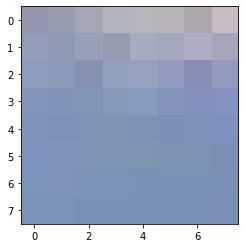

torch.Size([3, 8, 8])


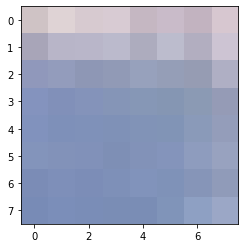

torch.Size([3, 8, 8])


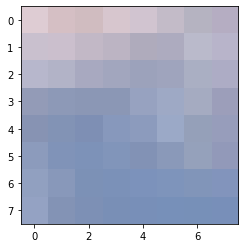

torch.Size([3, 8, 8])


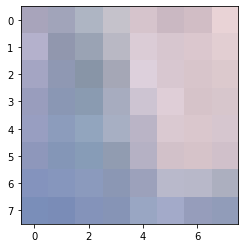

torch.Size([3, 8, 8])


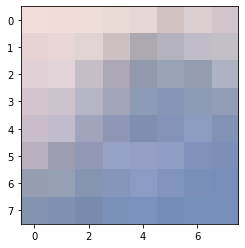

torch.Size([3, 8, 8])


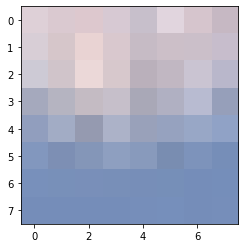

torch.Size([3, 8, 8])


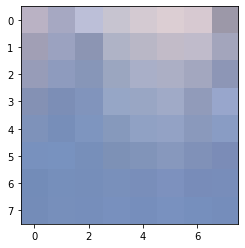

torch.Size([3, 8, 8])


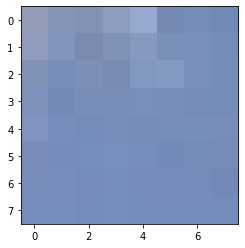

torch.Size([3, 8, 8])


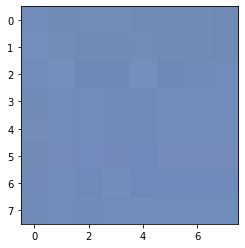

torch.Size([3, 8, 8])


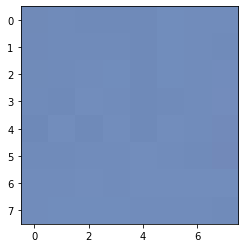

torch.Size([3, 8, 8])


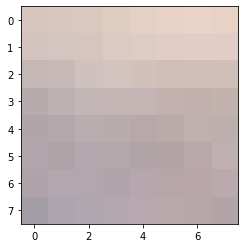

torch.Size([3, 8, 8])


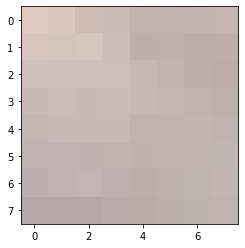

torch.Size([3, 8, 8])


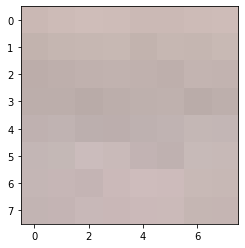

torch.Size([3, 8, 8])


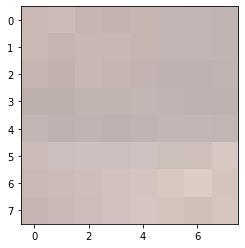

torch.Size([3, 8, 8])


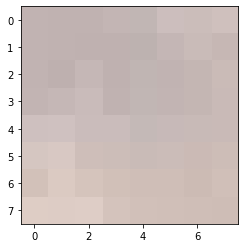

torch.Size([3, 8, 8])


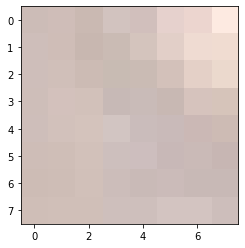

torch.Size([3, 8, 8])


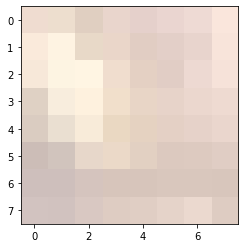

torch.Size([3, 8, 8])


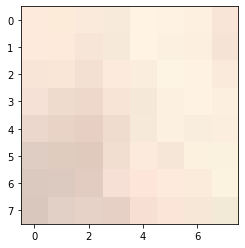

torch.Size([3, 8, 8])


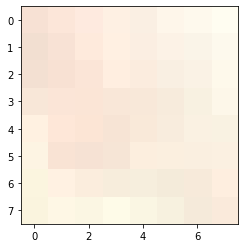

torch.Size([3, 8, 8])


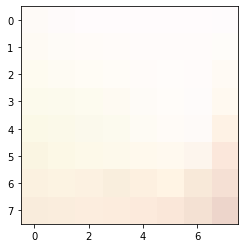

torch.Size([3, 8, 8])


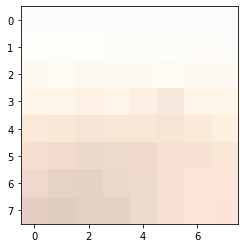

torch.Size([3, 8, 8])


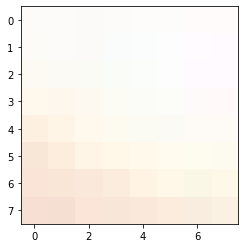

torch.Size([3, 8, 8])


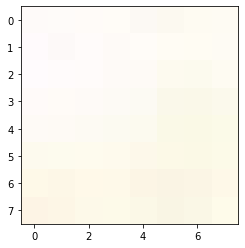

torch.Size([3, 8, 8])


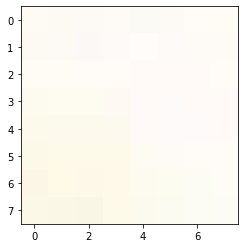

torch.Size([3, 8, 8])


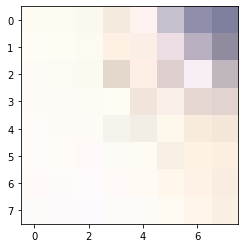

torch.Size([3, 8, 8])


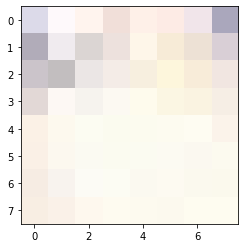

torch.Size([3, 8, 8])


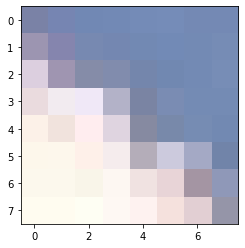

torch.Size([3, 8, 8])


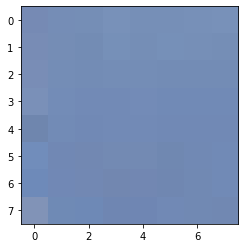

torch.Size([3, 8, 8])


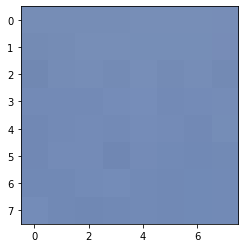

torch.Size([3, 8, 8])


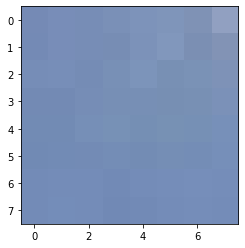

torch.Size([3, 8, 8])


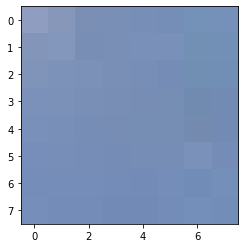

torch.Size([3, 8, 8])


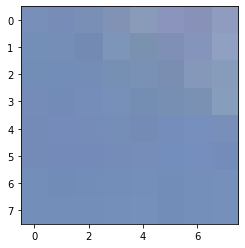

torch.Size([3, 8, 8])


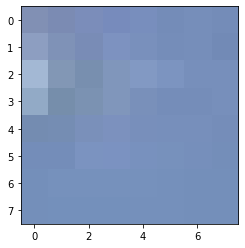

torch.Size([3, 8, 8])


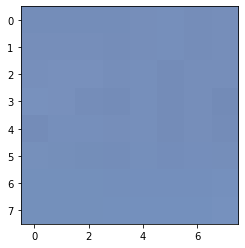

torch.Size([3, 8, 8])


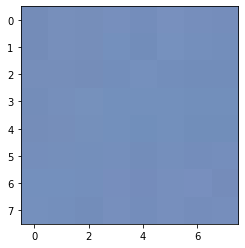

torch.Size([3, 8, 8])


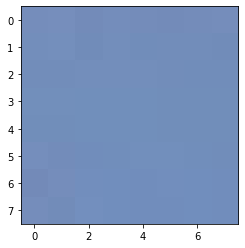

torch.Size([3, 8, 8])


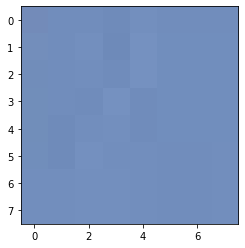

torch.Size([3, 8, 8])


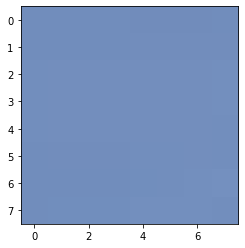

torch.Size([3, 8, 8])


KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt

x = patches[:,torch.from_numpy(numpy.arange(0,a[1])),:,:,:,:].split(1, dim=1)
for i in list(numpy.arange(a[1])):
    y =  x[i][:,:,torch.from_numpy(numpy.arange(0,a[2])),:,:,:].split(1, dim=2)
    for j in list(numpy.arange(a[2])):
        img: torch.Tensor = y[j].squeeze(0).squeeze(0).squeeze(0)
        print(img.shape)
        plt.imshow(img.numpy().transpose((1, 2, 0)))
        plt.show()